In [1]:
set.seed(1)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100)/10
y = 2 + 2*x1 + 0.3 * x2 + rnorm(100)

Regression coefficients:

B0: 2

B1: 2

B2: 0.3

x1 is linearly related to x2, x2 = 0.5x1 + eps

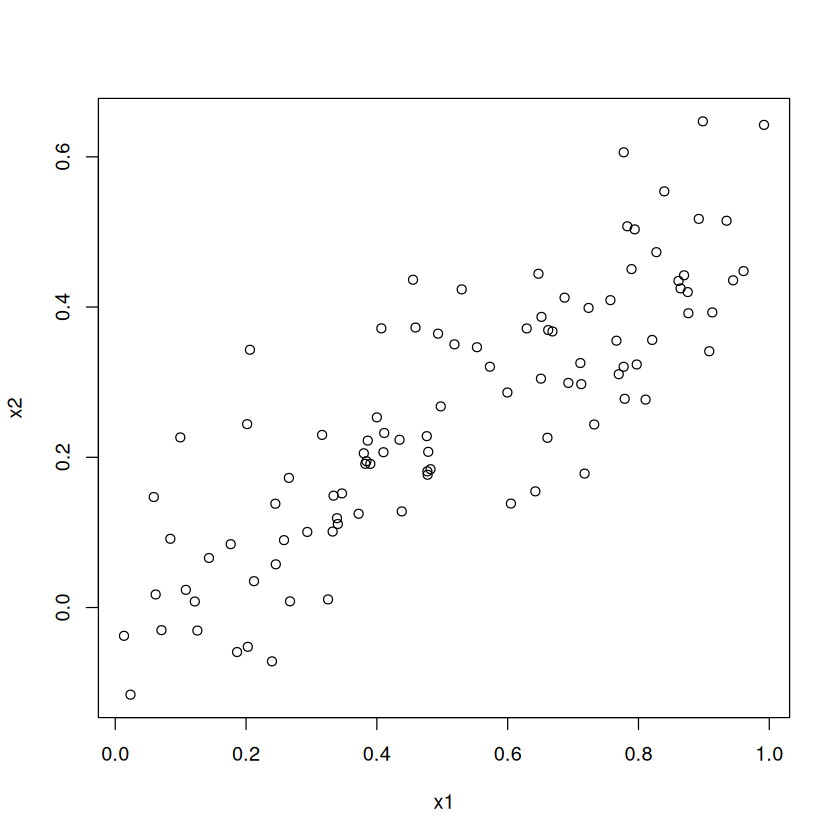

In [2]:
plot(x1, x2)

In [3]:
lm.fit = lm(y ~ x1 + x2)

In [4]:
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


y is majorly related to intecept, very little to x1, and not related to x2 based on the p values

R squared is pretty low suggesting that y isnt very well explained by x1 and x2

B0: 2.13

B1: 1.44

B2: 1.01

They are far from original B0, B1 and B2

We can reject the null hypothesis for B1 since its < 0.05, but we cannot reject H0 for B2

In [5]:
lm.fit2 = lm(y~x1)
summary(lm.fit2)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


This model is a lot better, based on the F statistic

Yes, we can reject H0: B1 = 0

In [7]:
lm.fit3 = lm(y~x2)
summary(lm.fit3)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


This model isnt as good as lm.fit2 or lm.fit

Yes, we can reject the null hypothesis

No, because x1 and x2 have collinearity, it is hard to distinguish their effects when regressed upon together. When they are regressed upon separately, the linear relationship between y and each predictor is indicated more clearly.

In [8]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)

In [9]:
lm.fit4 = lm(y~x1 + x2)

In [10]:
summary(lm.fit4)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.73348 -0.69318 -0.05263  0.66385  2.30619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2267     0.2314   9.624 7.91e-16 ***
x1            0.5394     0.5922   0.911  0.36458    
x2            2.5146     0.8977   2.801  0.00614 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.075 on 98 degrees of freedom
Multiple R-squared:  0.2188,	Adjusted R-squared:  0.2029 
F-statistic: 13.72 on 2 and 98 DF,  p-value: 5.564e-06


Now we can  reject the null hypothesis on B2 but not on B1

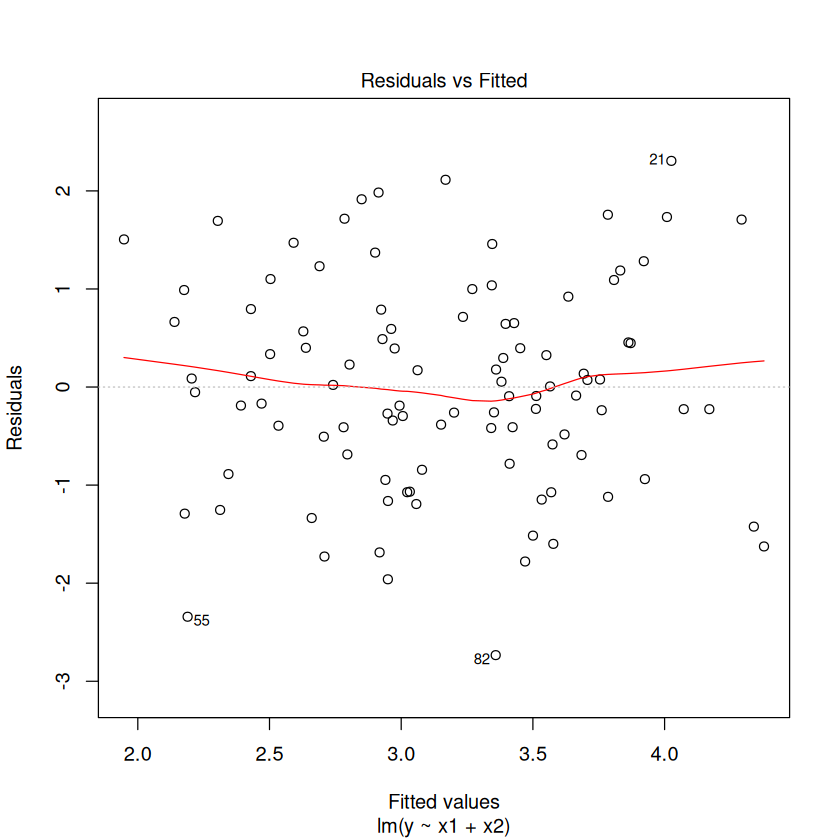

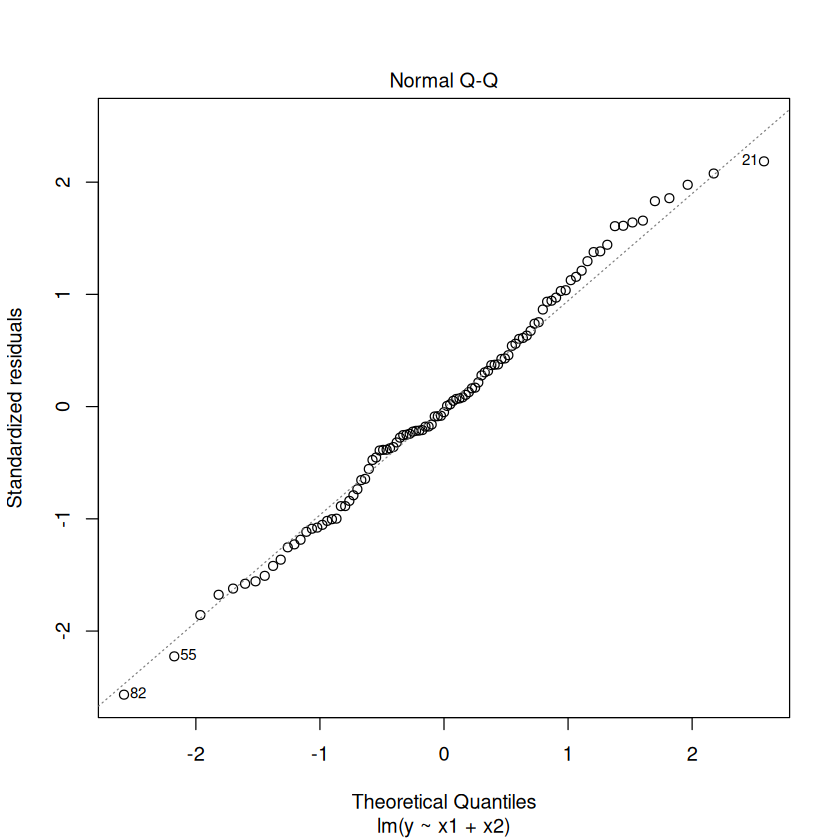

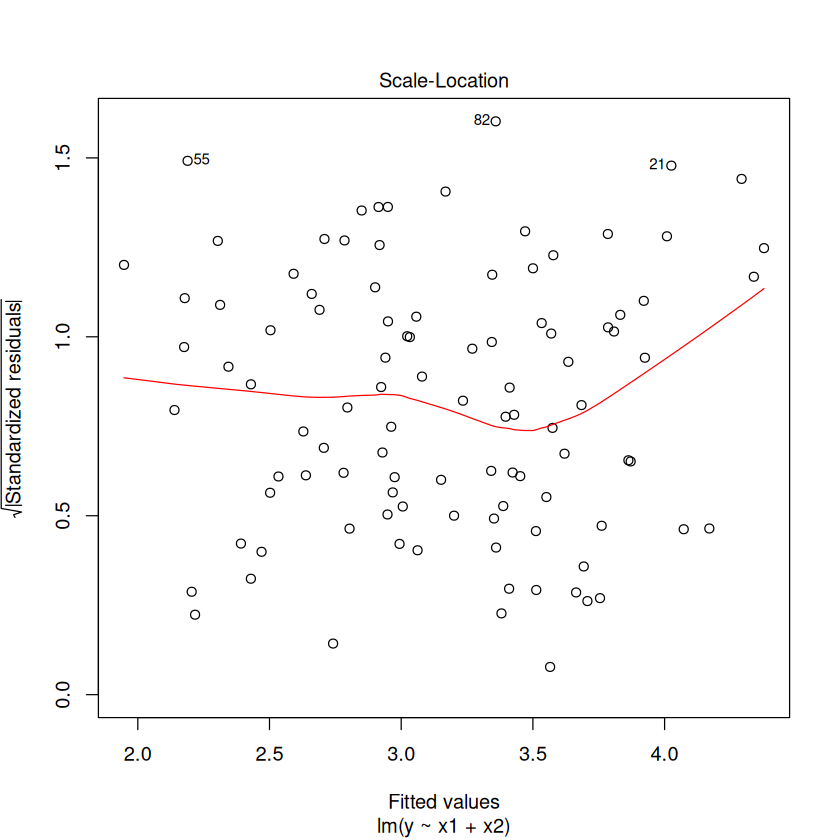

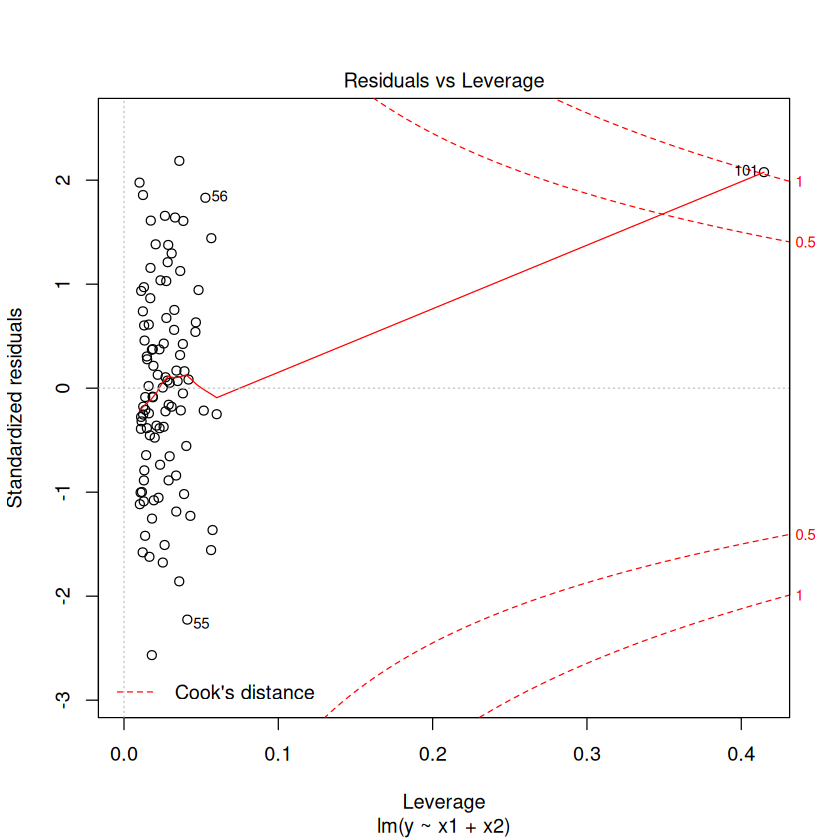

In [13]:
plot(lm.fit4)

The newly added point is a high leverage point.

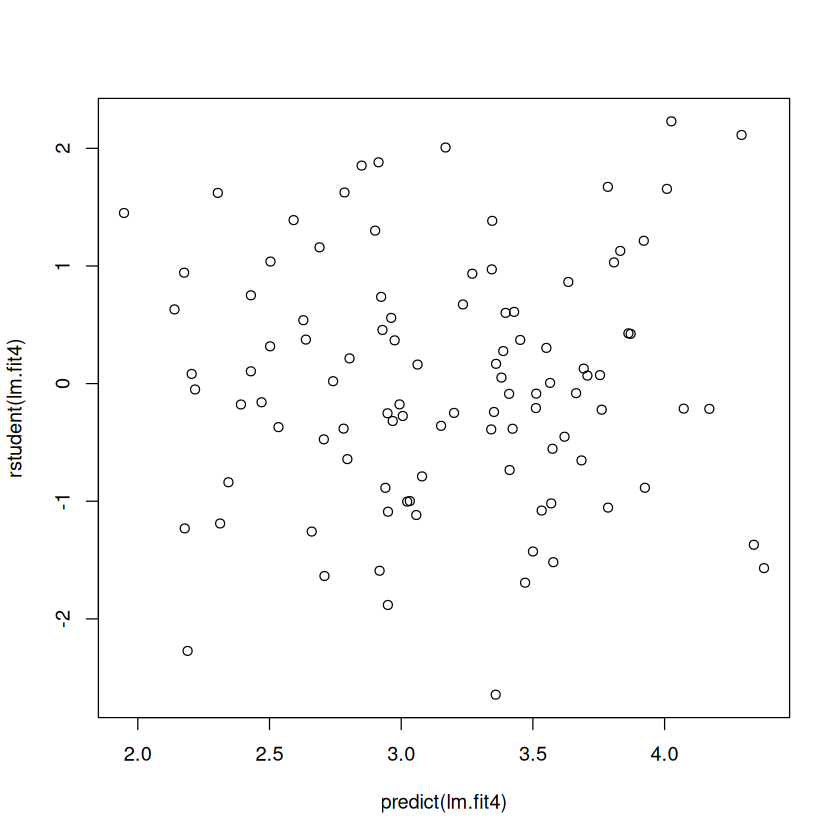

In [14]:
plot(predict(lm.fit4), rstudent(lm.fit4))

The point doesnt seem to be an outlier

In [11]:
lm.fit5 = lm(y~x1)

In [12]:
summary(lm.fit5)


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8897 -0.6556 -0.0909  0.5682  3.5665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2569     0.2390   9.445 1.78e-15 ***
x1            1.7657     0.4124   4.282 4.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.111 on 99 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1477 
F-statistic: 18.33 on 1 and 99 DF,  p-value: 4.295e-05


No we cant reject the null hypothesis

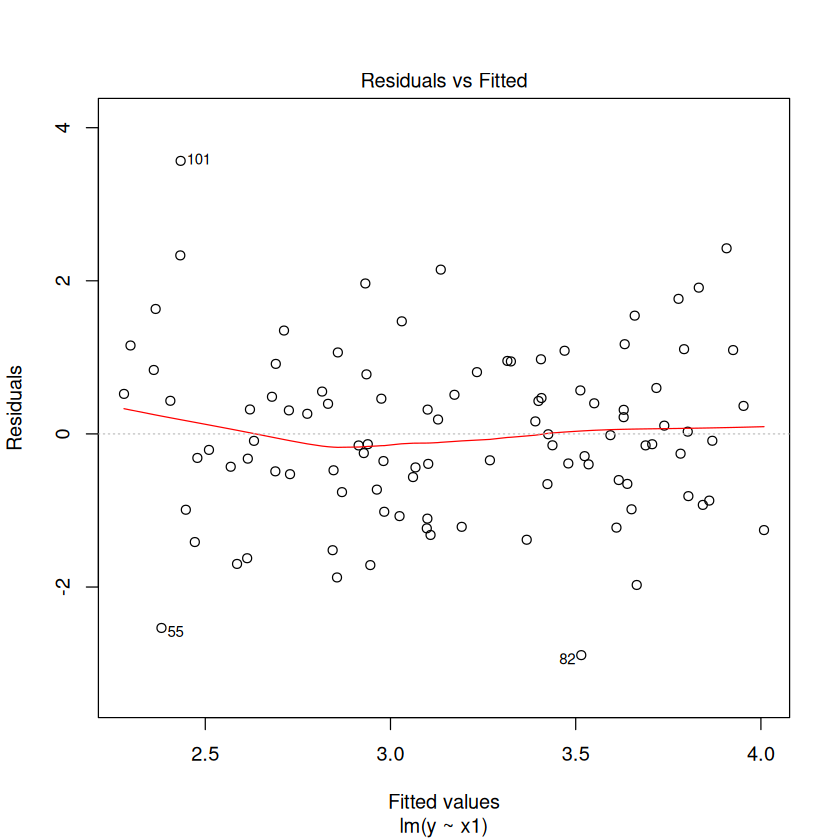

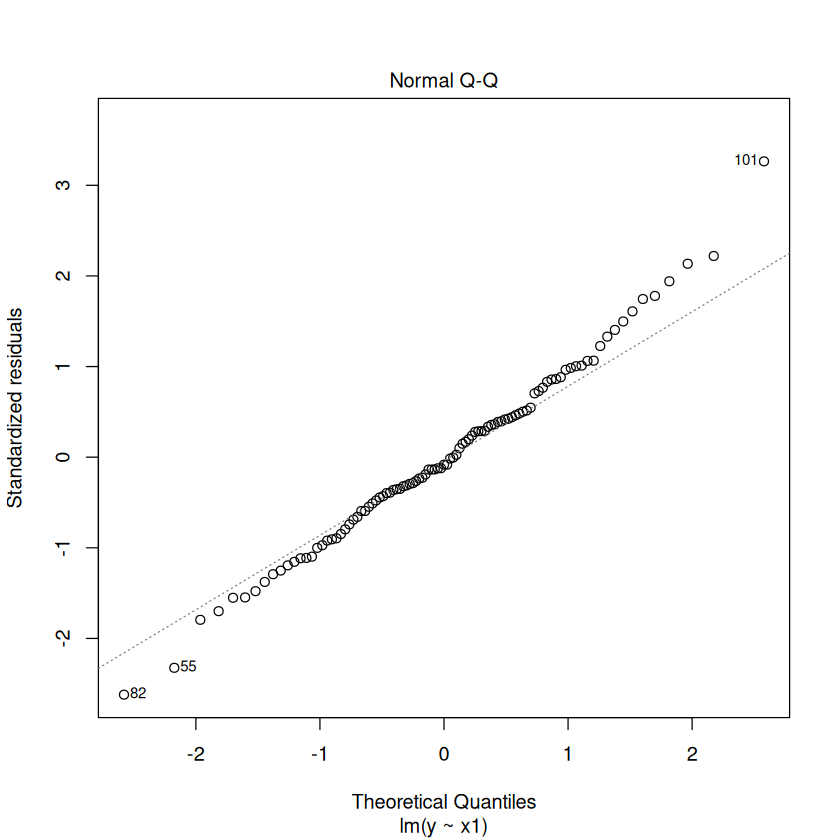

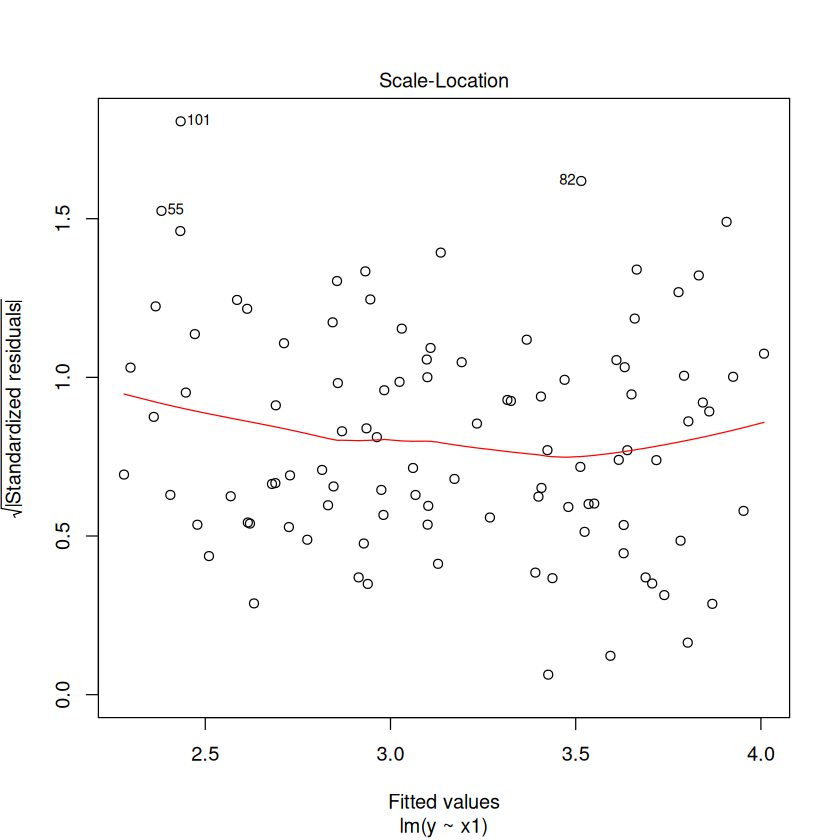

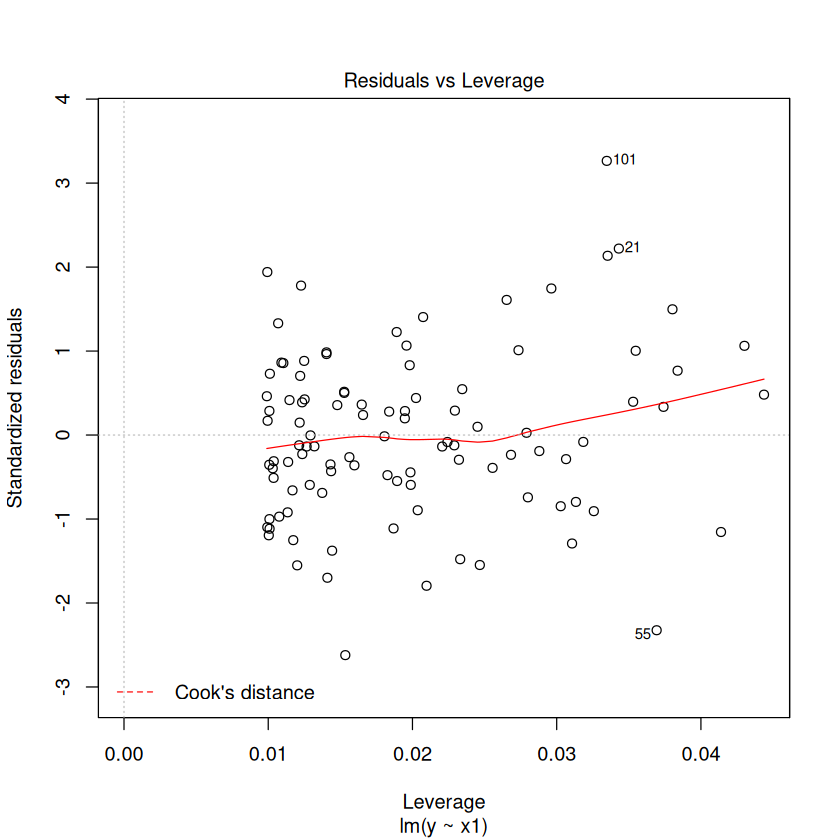

In [15]:
plot(lm.fit5)

This point doesnt seem to have a high leverage in this regression

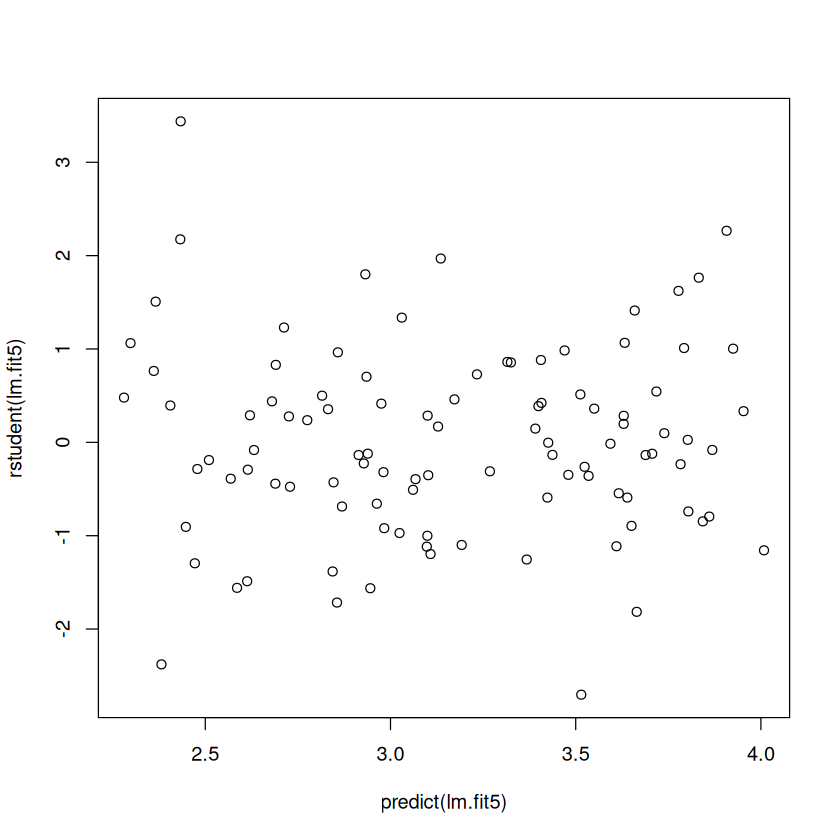

In [16]:
plot(predict(lm.fit5), rstudent(lm.fit5))

But this point is an outlier

In [17]:
lm.fit6 = lm(y~x2)

In [18]:
summary(lm.fit6)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64729 -0.71021 -0.06899  0.72699  2.38074 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3451     0.1912  12.264  < 2e-16 ***
x2            3.1190     0.6040   5.164 1.25e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 99 degrees of freedom
Multiple R-squared:  0.2122,	Adjusted R-squared:  0.2042 
F-statistic: 26.66 on 1 and 99 DF,  p-value: 1.253e-06


The null hypothesis can be rejected

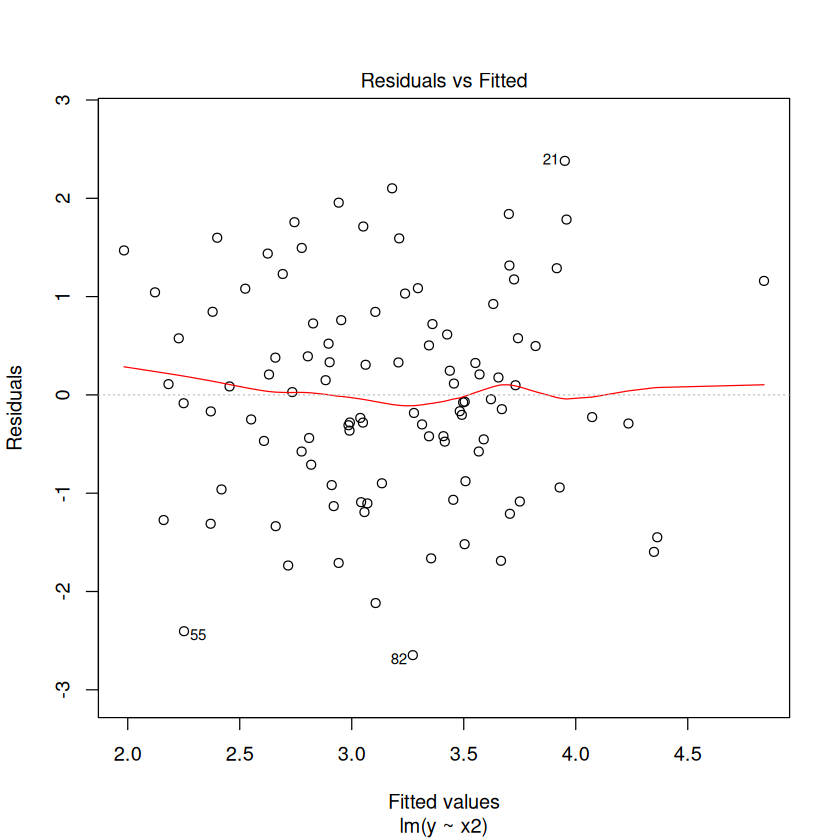

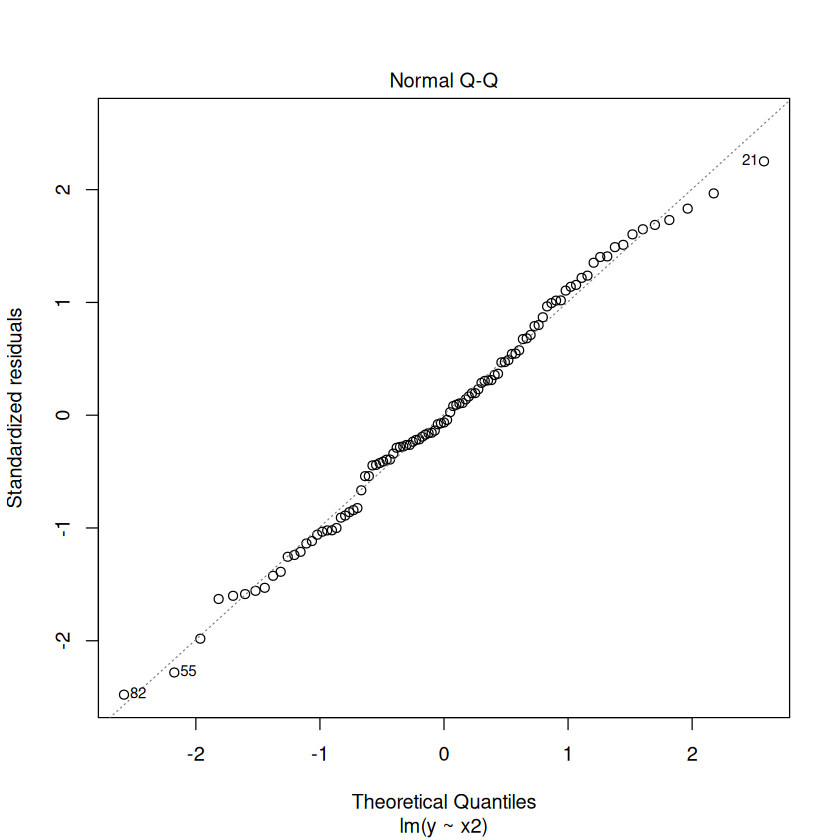

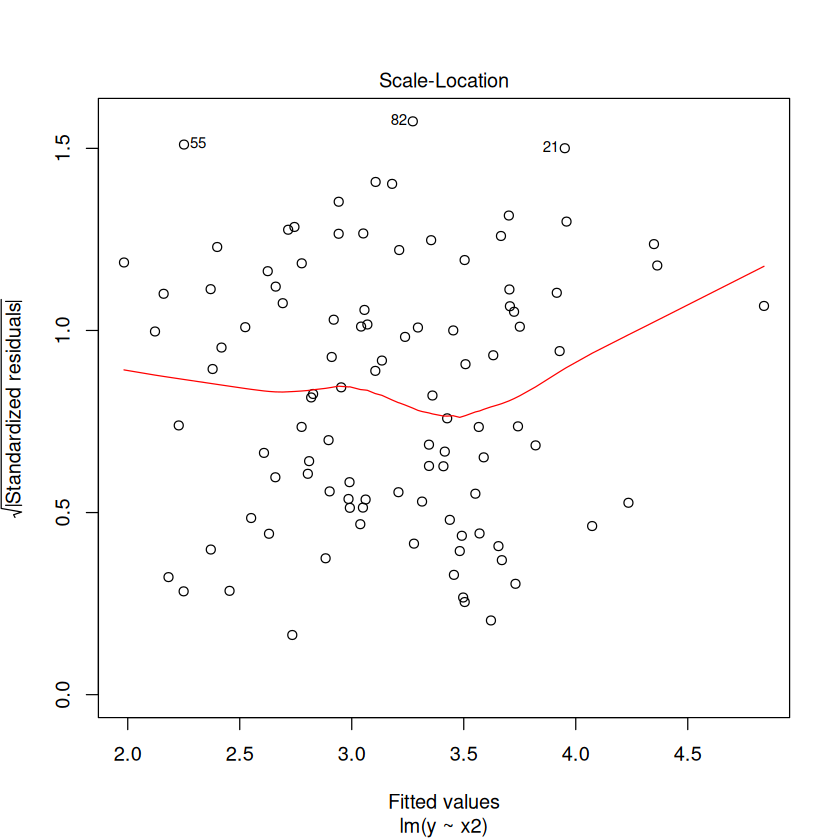

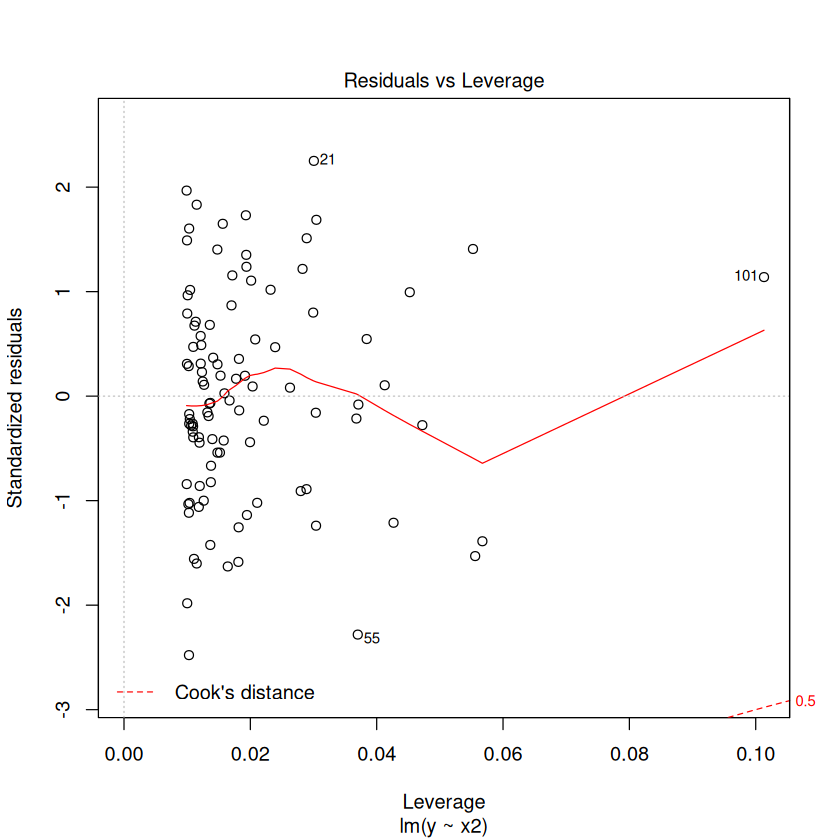

In [19]:
plot(lm.fit6)

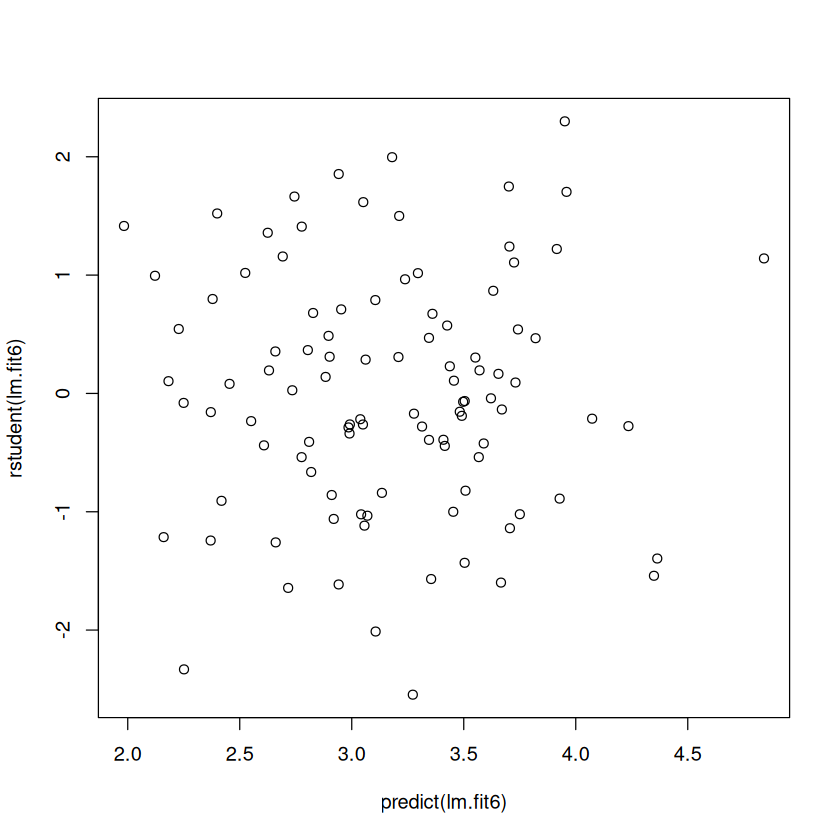

In [20]:
plot(predict(lm.fit6), rstudent(lm.fit6))

It is a clear leverage point here, but not an outlier